# ImmoEliza Data Analysis (test)

**This repository is contains Data Analysis for a fictional real estate company called "ImmoEliza". I created it as part of my [BeCode](https://www.becode.org) AI Bootcamp training in 2023.**

The data used in this project was sourced from the repository [ImmoEliza: Collecting Data](https://github.com/DeFre/ImmoEliza-collecting-data) which was used to collect data on 10.000 properties from Immoweb.

In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import time

pd.set_option('display.min_rows', 10)

## Import Data

In [2]:
properties_raw = pd.read_csv("../data/scraped_data_10_Myt.csv")
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Number of frontages,Construction year,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type
0,penthouse,turnhout,2300,10666429,€,Grote Markt 22,4,C,218,No,...,4,1997,As new,0,1,0,0,2,0,Gas
1,house,essen,2910,10666428,€469000,Heidestatiestraat 26,3,D,390,No,...,4,0,0,0,1,0,0,2,Installed,0
2,house,bierges,1301,10666426,€1395000,"Rue de Wavre, 27",5,C,178,0,...,4,1988,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil
3,apartment,arlon,6700,10666424,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
4,house,arlon,6700,10666423,€285000,Avenue de Longwy 340,2,D,299,0,...,2,0,Good,0,2,0,0,2,Installed,Electric
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,€1199000,Donksesteenweg 212,6,B,199,No,...,0,0,As new,0,2,0,No,3,Installed,Gas
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,€450000,Herbert Hooverplein 14,3,B,120,No,...,2,2007,Good,0,2,0,0,0,Hyper equipped,Gas
10136,penthouse,braine-l%27alleud,1420,10642943,€699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,3,2021,0,0,2,0,0,0,0,0
10137,house,wevelgem,8560,10642937,€340000,Markeplaats 9,4,B,161,0,...,0,1967,0,0,0,0,No,0,0,0


## Export Data
The two blocks below can be turned into Code Blocks depending on how you want to export your data. Keep them as markdown if you want to use Run All (Above).

### Overwrite outputfile
"""This codeblock OVERWRITES THE EXISTING OUTPUT FILE in the same folder as this notebook"""
data_to_save = properties_raw
reference = ""  #add/change reference (datasource/user). Add leading underscore to increase readability
output_filename = "saved_data" + reference + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

In [41]:
### Export to new timestamped file in /datadump (and overwrite existing output file)
"""This codeblock saves the dataframe in a NEW FILE WITH TIMESTAMP in the /datadump folder"""
data_to_save = properties_raw
data_to_save.to_csv("../data/saved_data_myt.csv") #uncomment this line if you want to overwrite saved_data.csv AND create a timestamped dump
reference = ""    #add/change reference (datasource/user). Add leading underscore to increase readability
timestamp = time.strftime("%Y%m%d-%H%M%S") #add date and time of creation
output_path = "../data/datadump/"     #leave empty to save the file in the same folder as your code, 
output_filename = output_path + "saved_data_myt_" + reference + timestamp  + ".csv" #assemble filename
data_to_save.to_csv(output_filename)

## Cleaning Data

### Remove "empty" rows and rows without a price

In [3]:
# Remove "empty" rows and rows without a price

print(properties_raw.shape[0])
#properties_raw = properties_raw.drop(properties_raw[(properties_raw.Price == 0) & (properties_raw.Address == 0) & (properties_raw.Bedrooms == 0) & (properties_raw.Furnished == 0)].index, inplace=True) #remove lines full of 0
properties_raw = properties_raw[properties_raw.loc[:, "Address"].astype(str).str.strip() != '0'] #solution by Jonathan #removes "empty" rows
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price"].astype(str).str.strip() != '€'] #removes rows without a price
#display(properties_raw)
print(properties_raw.shape[0])


10139
9446
8977


### Remove all non-numerical data from Price

In [4]:
# Remove all non-numerical data from Price

properties_raw["Price2"] = properties_raw.loc[:, "Price"].str.replace("\D", "", regex = True)


In [5]:
print(properties_raw.shape[0])
properties_raw = properties_raw[properties_raw.loc[:, "Price2"].astype(str).str.strip() != ''] #remove rows without a price
properties_raw["Price2"] = properties_raw["Price2"].astype(int) #Turn "Price 2 into an Integer"
print(properties_raw.shape[0])

8977
8833


In [6]:
print("raw: ",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] > 30000000].index) #removes properties costing more than 3M
print("limited to 3M:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Price2'] < 9999].index) #removes properties costing less than 10K
#properties_limited = properties_raw[properties_raw.iloc[:, 22].astype(int).int.strip() > 9999] #removes rows costing less than 10000
print("new limited 10K-3M:",properties_raw.shape[0])

raw:  8833
limited to 3M: 8828
new limited 10K-3M: 8700


In [7]:
properties_raw["Price_orig"] = properties_raw["Price"]
properties_raw["Price"] = properties_raw["Price2"]
properties_raw.drop(["Price2"], axis=1)
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,No,...,0,0,1,0,0,2,Installed,0,469000,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,Good,0,2,3,Yes,4,Hyper equipped,Fuel oil,1395000,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,As new,0,1,0,0,0,Installed,0,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,No,...,As new,0,2,0,No,3,Installed,Gas,1199000,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,No,...,Good,0,2,0,0,0,Hyper equipped,Gas,450000,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,No,...,0,0,2,0,0,0,0,0,699000,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,0,0,0,0,No,0,0,0,340000,€340000


### Turns Furnished, Terrace & Office Binary

In [8]:
# Turn Yes/No into 1/0

for i in ["Furnished", "Terrace", "Office"]:
    print(properties_raw[[i]].value_counts())
    properties_raw[i] = properties_raw[i].map({'Yes': 1, 'No': 0, '0':0, 0:0, 1:1})
    print(properties_raw[[i]].value_counts())
#display(properties_raw)

Furnished
0            4441
No           4013
Yes           246
Name: count, dtype: int64
Furnished
0            8454
1             246
Name: count, dtype: int64
Terrace
0          6425
Yes        2275
Name: count, dtype: int64
Terrace
0          6425
1          2275
Name: count, dtype: int64
Office
0         5462
No        2016
Yes       1222
Name: count, dtype: int64
Office
0         7478
1         1222
Name: count, dtype: int64


In [9]:
display(properties_raw)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,0,0,1,0,0,2,Installed,0,469000,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,Good,0,2,3,1,4,Hyper equipped,Fuel oil,1395000,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,As new,0,1,0,0,0,Installed,0,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,0,...,As new,0,2,0,0,3,Installed,Gas,1199000,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,0,...,Good,0,2,0,0,0,Hyper equipped,Gas,450000,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,...,0,0,2,0,0,0,0,0,699000,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,0,0,0,0,0,0,0,0,340000,€340000


In [10]:
properties_raw["Terrace2"] = np.where(properties_raw["Terrace surface"] !=0, 1, properties_raw["Terrace"])

In [11]:
print(properties_raw["Terrace"].value_counts())
print(properties_raw["Terrace2"].value_counts())

Terrace
0    6425
1    2275
Name: count, dtype: int64
Terrace2
1    5219
0    3481
Name: count, dtype: int64


In [12]:
properties_raw["Terrace"] = properties_raw["Terrace2"]
properties_raw.drop(["Terrace2"], axis=1)

,Type of property,Location,postal code,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Building condition,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig
1,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,0,0,1,0,0,2,Installed,0,469000,€469000
2,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,Good,0,2,3,1,4,Hyper equipped,Fuel oil,1395000,€1395000
3,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
4,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,Good,0,2,0,0,2,Installed,Electric,285000,€285000
5,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,As new,0,1,0,0,0,Installed,0,425000,€425000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10134,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199,0,...,As new,0,2,0,0,3,Installed,Gas,1199000,€1199000
10135,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120,0,...,Good,0,2,0,0,0,Hyper equipped,Gas,450000,€450000
10136,penthouse,braine-l%27alleud,1420,10642943,699000,Avenue Alphonse Allard 288,3,Not specified,Not specified,0,...,0,0,2,0,0,0,0,0,699000,€699000
10137,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161,0,...,0,0,0,0,0,0,0,0,340000,€340000


### Property Type & subtype

In [43]:
properties_raw.rename(columns = {'Type of property':'property_subtype'}, inplace = True)
print(properties_raw[["property_subtype"]].value_counts())

property_subtype                  
house                                 3264
apartment                             1728
villa                                  490
apartment-block                        163
duplex                                 158
mixed-use-building                     121
ground-floor                           108
flat-studio                             96
exceptional-property                    83
penthouse                               81
mansion                                 60
town-house                              49
bungalow                                41
country-cottage                         40
new-real-estate-project-apartments      28
loft                                    23
farmhouse                               19
service-flat                            15
triplex                                 14
manor-house                             11
castle                                  10
chalet                                   9
new-real-estate-pro

In [46]:
df_proptype = pd.read_csv("../data/propertytype.csv", encoding="latin-1")
properties_raw = properties_raw.merge(df_proptype, on=['property_subtype'], how='left')
properties_raw.sample(10)

,property_subtype,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,Province,Region,property_type
2339,house,hoboken,2660,10658553,299000,Prins Boudewijnlaan 122,3,C,224.0,0,...,0,1,0,Gas,299000,€299000,0,Antwerpen,Flanders,house
4157,apartment,aalbeke,8511,10652363,225000,Vanackerestraat 2,2,E,488.0,0,...,0,2,0,Electric,225000,€225000,1,West-Vlaanderen,Flanders,apartment
5670,house,philippeville,5600,10646626,185000,Faubourg Saint Germain 65,4,E,360.0,0,...,0,1,Installed,Fuel oil,185000,€185000,0,Namur,Wallonia,house
6204,house,eghez%C3%A9e,5310,10603439,275000,Grand' Route 3,3,F,453.0,0,...,0,2,0,Gas,275000,€275000,0,Namur,Wallonia,house
457,house,herselt%20%28ramsel%29,2230,10666009,199000,Kempische Steenweg 398,2,E,486.0,0,...,0,0,0,Pellet,199000,€199000,0,Antwerpen,Flanders,house
3412,house,mont-sur-marchienne,6032,10654927,428000,Avenue Paul pastur 380,5,G,666.0,0,...,0,3,Installed,Gas,428000,€428000,1,Hainaut,Wallonia,house
5109,apartment-block,anderlecht,1070,10648726,599000,"Avenue d'Itterbeek, 60",5,D,191.0,0,...,0,4,Installed,Gas,599000,€599000,1,Brussels Hoofdstedelijk Gewest,Brussels,apartment
38,house,lokeren,9160,10666333,175000,Kerkstraat 64,2,E,411.0,0,...,0,1,Installed,Gas,175000,€175000,0,Oost-Vlaanderen,Flanders,house
3440,apartment,knokke,8300,10654862,554000,Dumortierlaan 89,2,B,158.0,0,...,0,0,0,0,554000,€554000,0,West-Vlaanderen,Flanders,apartment
3759,new-real-estate-project-apartments,kraainem,1950,10653894,995000,Chaussée de Waterloo 1382,0,A,70.0,0,...,0,0,0,0,995000,€995000,0,Vlaams-Brabant,Flanders,apartment


In [13]:
#There were 3 weird variables in Energy Class with only one occurence, namely 'G_F', 'C_B', 'G_A++'. Added them tot "Not specified"

properties_raw["Energy class"]=np.where(properties_raw["Energy class"].isin(['G_F', 'C_B', 'G_A++']), "Not specified", properties_raw["Energy class"])

In [14]:
print(properties_raw[["Energy class"]].value_counts())

Energy class 
Not specified    1954
B                1386
C                1299
D                1100
F                1083
E                 793
A                 560
G                 471
A++                31
A+                 23
Name: count, dtype: int64


In [15]:
properties_raw.rename(columns = {'postal code':'Postcode'}, inplace = True)
print(properties_raw[["Postcode"]].value_counts())

Postcode
8300        229
9000        193
8370        163
1180        119
8400        111
           ... 
5353          1
5031          1
5004          1
5001          1
4731          1
Name: count, Length: 927, dtype: int64


### Cleaning Postal codes
Postal Codes should be 4 numeric digits, but we have some errors.

In [16]:
print("raw: ",properties_raw.shape[0])
properties_raw["Postcode"] = properties_raw.loc[:, "Postcode"].astype(str).str.replace("\D", "", regex = True)
properties_raw['Postcode'] = properties_raw['Postcode'].astype(int)
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] > 9999].index) #removes properties costing more than 3M
print("limited too high:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw['Postcode'] < 999].index) #removes properties costing less than 10K
#properties_limited = properties_raw[properties_raw.iloc[:, 22].astype(int).int.strip() > 9999] #removes rows costing less than 10000
print("4 digit:",properties_raw.shape[0])

raw:  8700
limited too high: 8595
4 digit: 8595


### Add Regions

In [17]:
df_localities = pd.read_csv("../data/postal_code-municipality-province.csv", encoding="latin-1")
df_localities = df_localities[['Postcode', 'Provincie']].drop_duplicates().reset_index(drop=True)
print(df_localities.head())

   Postcode                       Provincie
0      1000  Brussels Hoofdstedelijk Gewest
1      1030  Brussels Hoofdstedelijk Gewest
2      1040  Brussels Hoofdstedelijk Gewest
3      1050  Brussels Hoofdstedelijk Gewest
4      1060  Brussels Hoofdstedelijk Gewest


In [18]:
df_localities['Gemeenschap'] = np.where(
    df_localities.Provincie.isin(['Vlaams-Brabant', 'Antwerpen', 'Limburg', 'West-Vlaanderen', 'Oost-Vlaanderen']),
    'Flanders',
    np.where(df_localities.Provincie == 'Brussels Hoofdstedelijk Gewest',
             'Brussels',
             'Wallonia'
    )
)

In [19]:
df_localities["Postcode"].astype(int)
df_localities["Provincie"].astype(str)
df_localities["Gemeenschap"].astype(str)

0       Brussels
1       Brussels
2       Brussels
3       Brussels
4       Brussels
          ...   
1138    Flanders
1139    Flanders
1140    Flanders
1141    Flanders
1142    Flanders
Name: Gemeenschap, Length: 1143, dtype: object

In [20]:
df_localities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Postcode     1143 non-null   int64 
 1   Provincie    1143 non-null   object
 2   Gemeenschap  1143 non-null   object
dtypes: int64(1), object(2)
memory usage: 26.9+ KB


In [21]:
print(df_localities.sample(10))

      Postcode       Provincie Gemeenschap
781       4701         Liï¿½ge    Wallonia
628       1702  Vlaams-Brabant    Flanders
1035      7823         Hainaut    Wallonia
288       4690         Liï¿½ge    Wallonia
209       3665         Limburg    Flanders
142       2660       Antwerpen    Flanders
890       6534         Hainaut    Wallonia
92        2160       Antwerpen    Flanders
416       6950      Luxembourg    Wallonia
25        1340  Brabant wallon    Wallonia


In [22]:
properties_raw = properties_raw.merge(df_localities, on=['Postcode'], how='left')
properties_raw.head()

,Type of property,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,Provincie,Gemeenschap
0,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390,0,...,0,0,2,Installed,0,469000,€469000,1,Antwerpen,Flanders
1,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178,0,...,3,1,4,Hyper equipped,Fuel oil,1395000,€1395000,1,Brabant wallon,Wallonia
2,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299,0,...,0,0,2,Installed,Electric,285000,€285000,0,Luxembourg,Wallonia
3,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299,0,...,0,0,2,Installed,Electric,285000,€285000,0,Luxembourg,Wallonia
4,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254,0,...,0,0,0,Installed,0,425000,€425000,1,Antwerpen,Flanders


In [23]:
properties_raw.rename(columns = {'Provincie':'Province', 'Gemeenschap':'Region'}, inplace = True)

### seperate Dataframe for Primary Energy Consumption vs Price

In [24]:
energy_price_df = properties_raw.loc[:,["Price", "Energy class", "Primary energy consumption", "Postcode", "Province", "Region"]]
display(energy_price_df.sample(10))

,Price,Energy class,Primary energy consumption,Postcode,Province,Region
264,369000,E,485,2000,Antwerpen,Flanders
256,550000,E,410,2060,Antwerpen,Flanders
7821,265000,Not specified,Not specified,1547,Vlaams-Brabant,Flanders
1301,150000,F,539,3300,Vlaams-Brabant,Flanders
6867,249000,B,150,3770,Limburg,Flanders
3844,429500,A,1,9890,Oost-Vlaanderen,Flanders
4571,130000,D,319,7603,Hainaut,Wallonia
7068,299000,D,194,1190,Brussels Hoofdstedelijk Gewest,Brussels
937,529000,Not specified,Not specified,8810,West-Vlaanderen,Flanders
4379,279000,E,436,2890,Antwerpen,Flanders


In [25]:
properties_raw["Primary energy consumption"]=pd.to_numeric(properties_raw["Primary energy consumption"], errors='coerce')
display(properties_raw.sample(10))

,Type of property,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,Province,Region
5500,town-house,haneffe,4357,10652357,359100,"Chaussée Romaine, 200",3,A++,NaN,0,...,0,0,2,Not installed,0,359100,€359100,0,Liï¿½ge,Wallonia
3311,house,jemelle,5580,10657985,178330,Rue de Malvoisin 38,3,Not specified,NaN,0,...,0,0,2,USA uninstalled,0,178330,€178330,0,Namur,Wallonia
794,penthouse,nivelles,1400,10665658,298000,Place Emile Delalieux 1,2,D,303.0,0,...,1,0,1,Installed,Electric,298000,€298000,1,Brabant wallon,Wallonia
3019,apartment,ixelles,1050,10658844,340000,Avenue des Saisons 42,1,Not specified,NaN,0,...,0,0,1,0,Gas,340000,€340000,1,Brussels Hoofdstedelijk Gewest,Brussels
2132,ground-floor,brugge,8000,10661662,27500,Adegem-dorp 49/001,2,Not specified,NaN,0,...,0,0,2,0,0,27500,€27.500.,1,West-Vlaanderen,Flanders
230,apartment,bruxelles,1000,10666879,365000,Avenue Louise 433,5,G,546.0,0,...,1,0,1,Installed,Gas,365000,€365000,0,Brussels Hoofdstedelijk Gewest,Brussels
1836,house,berchem,2600,10662761,549000,Lodewijk van Berckenlaan 167,3,B,195.0,0,...,0,1,2,Installed,Gas,549000,€549000,1,Antwerpen,Flanders
8514,villa,knokke-heist,8300,10643168,2295000,Zeedijk 673,3,C,231.0,0,...,0,0,0,0,0,2295000,€2295000,1,West-Vlaanderen,Flanders
4343,apartment,hamont-achel,3930,10655179,289000,Kapittelhof 22,2,C,211.0,0,...,0,0,0,0,Gas,289000,€289000,1,Limburg,Flanders
5390,house,soumagne,4630,10652713,249000,Avenue Franklin Roosevelt 22A,4,E,351.0,0,...,0,0,2,Installed,Fuel oil,249000,€249000,1,Liï¿½ge,Wallonia


In [26]:
print("dropna:",energy_price_df.shape[0])
properties_raw = properties_raw.dropna()
print("dropna:",properties_raw.shape[0])
properties_raw = properties_raw.drop(properties_raw[properties_raw["Primary energy consumption"] > 2000].index)
print("under2000:",properties_raw.shape[0])
display(properties_raw.sample(10))


dropna: 8595
dropna: 6633
under2000: 6623


,Type of property,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,Province,Region
7912,house,wontergem,9800,10645204,393000,Iepersestraat 181-185,3,A,10.0,0,...,0,0,2,Hyper equipped,0,393000,€393000,0,Oost-Vlaanderen,Flanders
2076,villa,wakken,8720,10661834,597950,Izegemstraat 355,4,C,249.0,0,...,0,1,0,0,Fuel oil,597950,€597950,1,West-Vlaanderen,Flanders
6369,apartment,mechelen,2800,10649624,245000,"Liersesteenweg , 394",2,B,130.0,0,...,0,0,1,0,0,245000,€245000,0,Antwerpen,Flanders
2322,house,boussu,7300,10660578,180000,101 rue de Valenciennes,2,F,462.0,0,...,1,1,1,Installed,0,180000,€180000,1,Hainaut,Wallonia
4193,house,borgloon,3840,10655575,165000,"Abeelplein, 15",3,F,846.0,0,...,0,0,1,Installed,Fuel oil,165000,€165000,1,Limburg,Flanders
2996,ground-floor,oud-turnhout,2360,10658907,199000,Kempenlaan 32,2,B,187.0,0,...,0,0,2,Semi equipped,Gas,199000,€199000,0,Antwerpen,Flanders
7172,house,geel,2440,10647313,365000,Markt 20,5,C,276.0,0,...,1,0,1,Installed,Gas,365000,€365000,1,Antwerpen,Flanders
3687,apartment,geraardsbergen,9500,10656788,283000,"Hundelgemsesteenweg, 306",2,B,185.0,0,...,0,0,1,0,Gas,283000,€283000,1,Oost-Vlaanderen,Flanders
4415,house,celles,7760,10655013,305000,Abeelstraat 9A,3,B,148.0,0,...,0,0,2,Installed,Gas,305000,€305000,1,Hainaut,Wallonia
6318,house,chastre,1450,10649789,625000,Grand' Route 3,4,C,236.0,0,...,0,0,0,Installed,Fuel oil,625000,€625000,1,Brabant wallon,Wallonia


### .info() & .describe()

In [27]:
properties_raw['Postcode'].info()

<class 'pandas.core.series.Series'>
Index: 6623 entries, 0 to 8594
Series name: Postcode
Non-Null Count  Dtype
--------------  -----
6623 non-null   int32
dtypes: int32(1)
memory usage: 77.6 KB


In [28]:
df_localities['Postcode'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1143 entries, 0 to 1142
Series name: Postcode
Non-Null Count  Dtype
--------------  -----
1143 non-null   int64
dtypes: int64(1)
memory usage: 9.1 KB


In [29]:
properties_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6623 entries, 0 to 8594
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Type of property            6623 non-null   object 
 1   Location                    6623 non-null   object 
 2   Postcode                    6623 non-null   int32  
 3   immo code                   6623 non-null   int64  
 4   Price                       6623 non-null   int32  
 5   Address                     6623 non-null   object 
 6   Bedrooms                    6623 non-null   int64  
 7   Energy class                6623 non-null   object 
 8   Primary energy consumption  6623 non-null   float64
 9   Furnished                   6623 non-null   int64  
 10  Terrace                     6623 non-null   int64  
 11  Terrace surface             6623 non-null   int64  
 12  Surface of the plot         6623 non-null   int64  
 13  Living room surface         6623 non-n

In [30]:
sel_cols = list(properties_raw.select_dtypes(include='int64'))
sel_cols

['immo code',
 'Bedrooms',
 'Furnished',
 'Terrace',
 'Terrace surface',
 'Surface of the plot',
 'Living room surface',
 'Number of frontages',
 'Construction year',
 'Outdoor parking space',
 'Bathrooms',
 'Shower rooms',
 'Office',
 'Toilets',
 'Terrace2']

In [31]:
sel_cols = list(properties_raw.select_dtypes(include='object'))
sel_cols

['Type of property',
 'Location',
 'Address',
 'Energy class',
 'Building condition',
 'Kitchen type',
 'Heating type',
 'Price_orig',
 'Province',
 'Region']

In [32]:
properties_raw.describe()

,Postcode,immo code,Price,Bedrooms,Primary energy consumption,Furnished,Terrace,Terrace surface,Surface of the plot,Living room surface,Number of frontages,Construction year,Outdoor parking space,Bathrooms,Shower rooms,Office,Toilets,Price2,Terrace2
count,6623.000000,6.623000e+03,6.623000e+03,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.000000,6623.0,6623.000000,6623.000000,6623.000000,6623.000000,6.623000e+03,6623.000000
mean,5180.100710,1.064334e+07,4.286691e+05,3.037445,323.162971,0.028537,0.621471,8.823796,788.168504,16.977805,2.114148,1261.494338,0.0,1.239167,0.365846,0.159746,1.327797,4.286691e+05,0.621471
std,3121.481775,5.501526e+04,4.559258e+05,1.641297,220.501734,0.166514,0.485057,23.550973,4476.607741,35.447171,1.439283,945.341303,0.0,1.076026,2.198904,0.366398,1.239352,4.559258e+05,0.485057
min,1000.000000,9.360253e+06,1.000000e+04,0.000000,-30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-1.000000,0.000000,0.000000,1.000000e+04,0.000000
25%,2170.000000,1.064758e+07,2.290000e+05,2.000000,169.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,1.000000,2.290000e+05,0.000000
50%,4630.000000,1.065438e+07,3.200000e+05,3.000000,274.000000,0.000000,1.000000,0.000000,162.000000,0.000000,2.000000,1948.000000,0.0,1.000000,0.000000,0.000000,1.000000,3.200000e+05,1.000000
75%,8450.000000,1.066039e+07,4.690000e+05,4.000000,419.000000,0.000000,1.000000,9.000000,600.000000,32.000000,3.000000,1979.000000,0.0,1.000000,0.000000,0.000000,2.000000,4.690000e+05,1.000000
max,9991.000000,1.066718e+07,6.975000e+06,30.000000,1860.000000,1.000000,1.000000,663.000000,160737.000000,2340.000000,4.000000,2025.000000,0.0,27.000000,116.000000,1.000000,20.000000,6.975000e+06,1.000000


### Display Data

In [33]:
display(properties_raw)

,Type of property,Location,Postcode,immo code,Price,Address,Bedrooms,Energy class,Primary energy consumption,Furnished,...,Shower rooms,Office,Toilets,Kitchen type,Heating type,Price2,Price_orig,Terrace2,Province,Region
0,house,essen,2910,10666428,469000,Heidestatiestraat 26,3,D,390.0,0,...,0,0,2,Installed,0,469000,€469000,1,Antwerpen,Flanders
1,house,bierges,1301,10666426,1395000,"Rue de Wavre, 27",5,C,178.0,0,...,3,1,4,Hyper equipped,Fuel oil,1395000,€1395000,1,Brabant wallon,Wallonia
2,apartment,arlon,6700,10666424,285000,Avenue de Longwy 340,2,D,299.0,0,...,0,0,2,Installed,Electric,285000,€285000,0,Luxembourg,Wallonia
3,house,arlon,6700,10666423,285000,Avenue de Longwy 340,2,D,299.0,0,...,0,0,2,Installed,Electric,285000,€285000,0,Luxembourg,Wallonia
4,apartment,antwerp,2000,10666422,425000,"Grote steenweg, 511",2,C,254.0,0,...,0,0,0,Installed,0,425000,€425000,1,Antwerpen,Flanders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8589,house,tremelo,3120,10642957,499000,Schrieksebaan 53B001,3,D,383.0,0,...,0,1,2,Installed,0,499000,€499000,1,Vlaams-Brabant,Flanders
8590,villa,schilde,2970,10642946,1199000,Donksesteenweg 212,6,B,199.0,0,...,0,0,3,Installed,Gas,1199000,€1199000,1,Antwerpen,Flanders
8591,duplex,bierbeek%20korbeek-lo,3360,10531808,450000,Herbert Hooverplein 14,3,B,120.0,0,...,0,0,0,Hyper equipped,Gas,450000,€450000,1,Vlaams-Brabant,Flanders
8593,house,wevelgem,8560,10642937,340000,Markeplaats 9,4,B,161.0,0,...,0,0,0,0,0,340000,€340000,1,West-Vlaanderen,Flanders


## Graphs

In [34]:
ordered_E_class = ['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']
ordered_E_class_aplus_to_g = ['A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G']
print(ordered_E_class)

['A++', 'A+', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'Not specified']


### Energy Class
(Including Not specified)

<Axes: xlabel='Energy class', ylabel='count'>

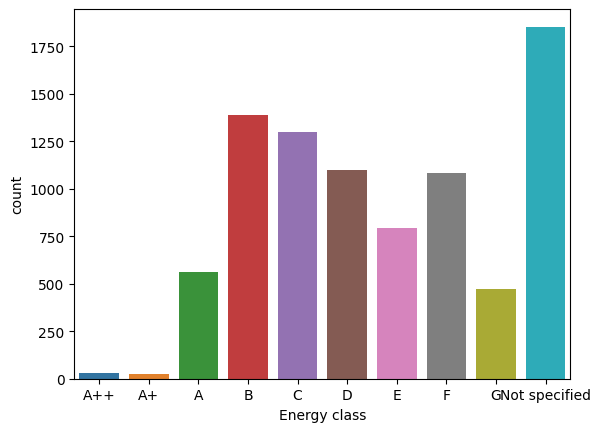

In [35]:
sns.countplot(x="Energy class", data=energy_price_df, order=ordered_E_class)

### Energy Class vs Price

[Text(0.5, 1.0, 'Energy Class versus Price'), Text(0, 0.5, 'Price in €')]

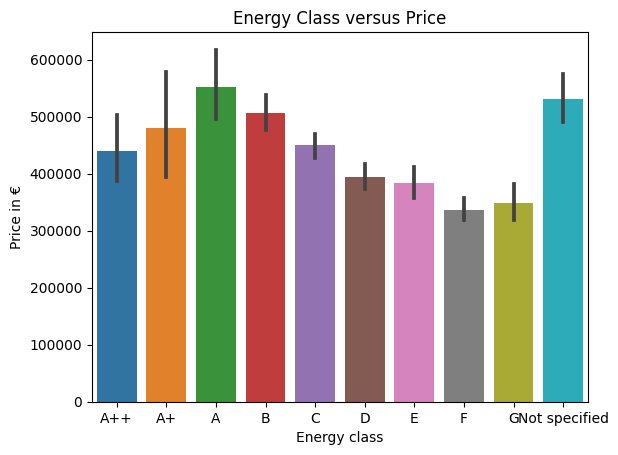

In [36]:
sns.barplot(x="Energy class", y="Price", data=energy_price_df, order=ordered_E_class).set(title = "Energy Class versus Price", ylabel='Price in €')

[Text(0.5, 1.0, 'Energy Class versus Price per Region'),
 Text(0, 0.5, 'Price in €')]

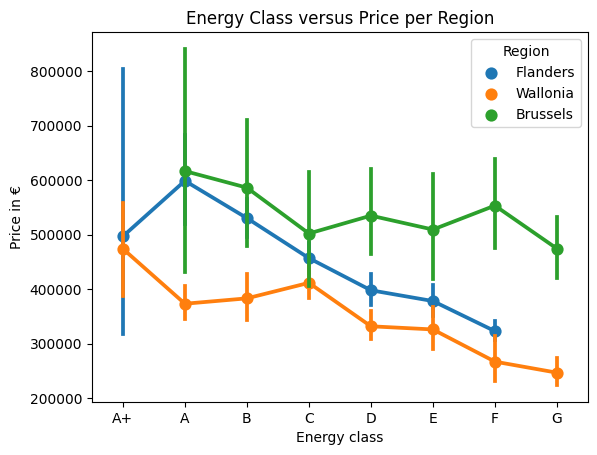

In [37]:
sns.pointplot(x="Energy class", y="Price", hue = "Region",data=energy_price_df, order=ordered_E_class_aplus_to_g,).set(title = "Energy Class versus Price per Region", ylabel='Price in €')

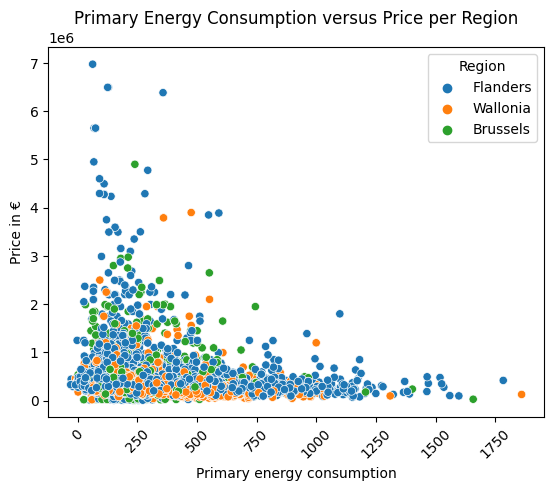

In [38]:
sns.scatterplot(x="Primary energy consumption", y="Price", hue = "Region",data=properties_raw).set(title = "Primary Energy Consumption versus Price per Region", ylabel='Price in €')
plt.xticks(rotation=45)
plt.show()

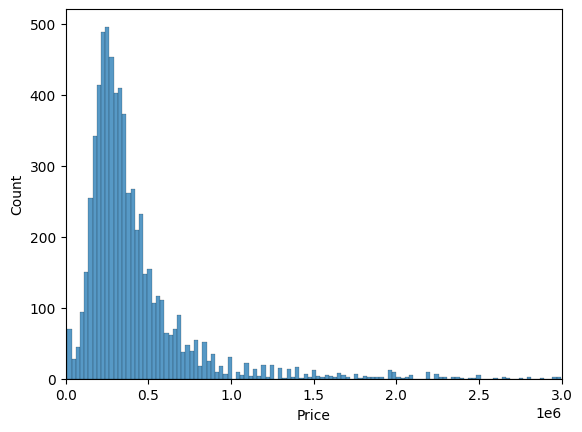

In [39]:
sns.histplot(x="Price", data=properties_raw)
plt.xlim(0, 3000000)
plt.show()

### Energy Classes

In [40]:
epc_be = pd.read_csv("../data/epc_be.csv")
display(epc_be)
sns.pointplot(x="Energy_label", data=epc_be)

,Energy_label,Flanders,Wallonia,Brussels
0,OMG,700.0,700,700.0
1,G,NaN,510,345.0
2,F,500.0,425,276.0
3,E,400.0,340,211.0
4,D,300.0,255,151.0
5,C,200.0,170,96.0
6,B,100.0,85,46.0
7,A,0.0,45,0.0
8,A+,-100.0,0,NaN


TypeError: Horizontal orientation requires numeric `x` variable.